In [49]:
print("Feature Selection using visualization of Trends")

Feature Selection using visualization of Trends


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Trends for Bearing1_1_features


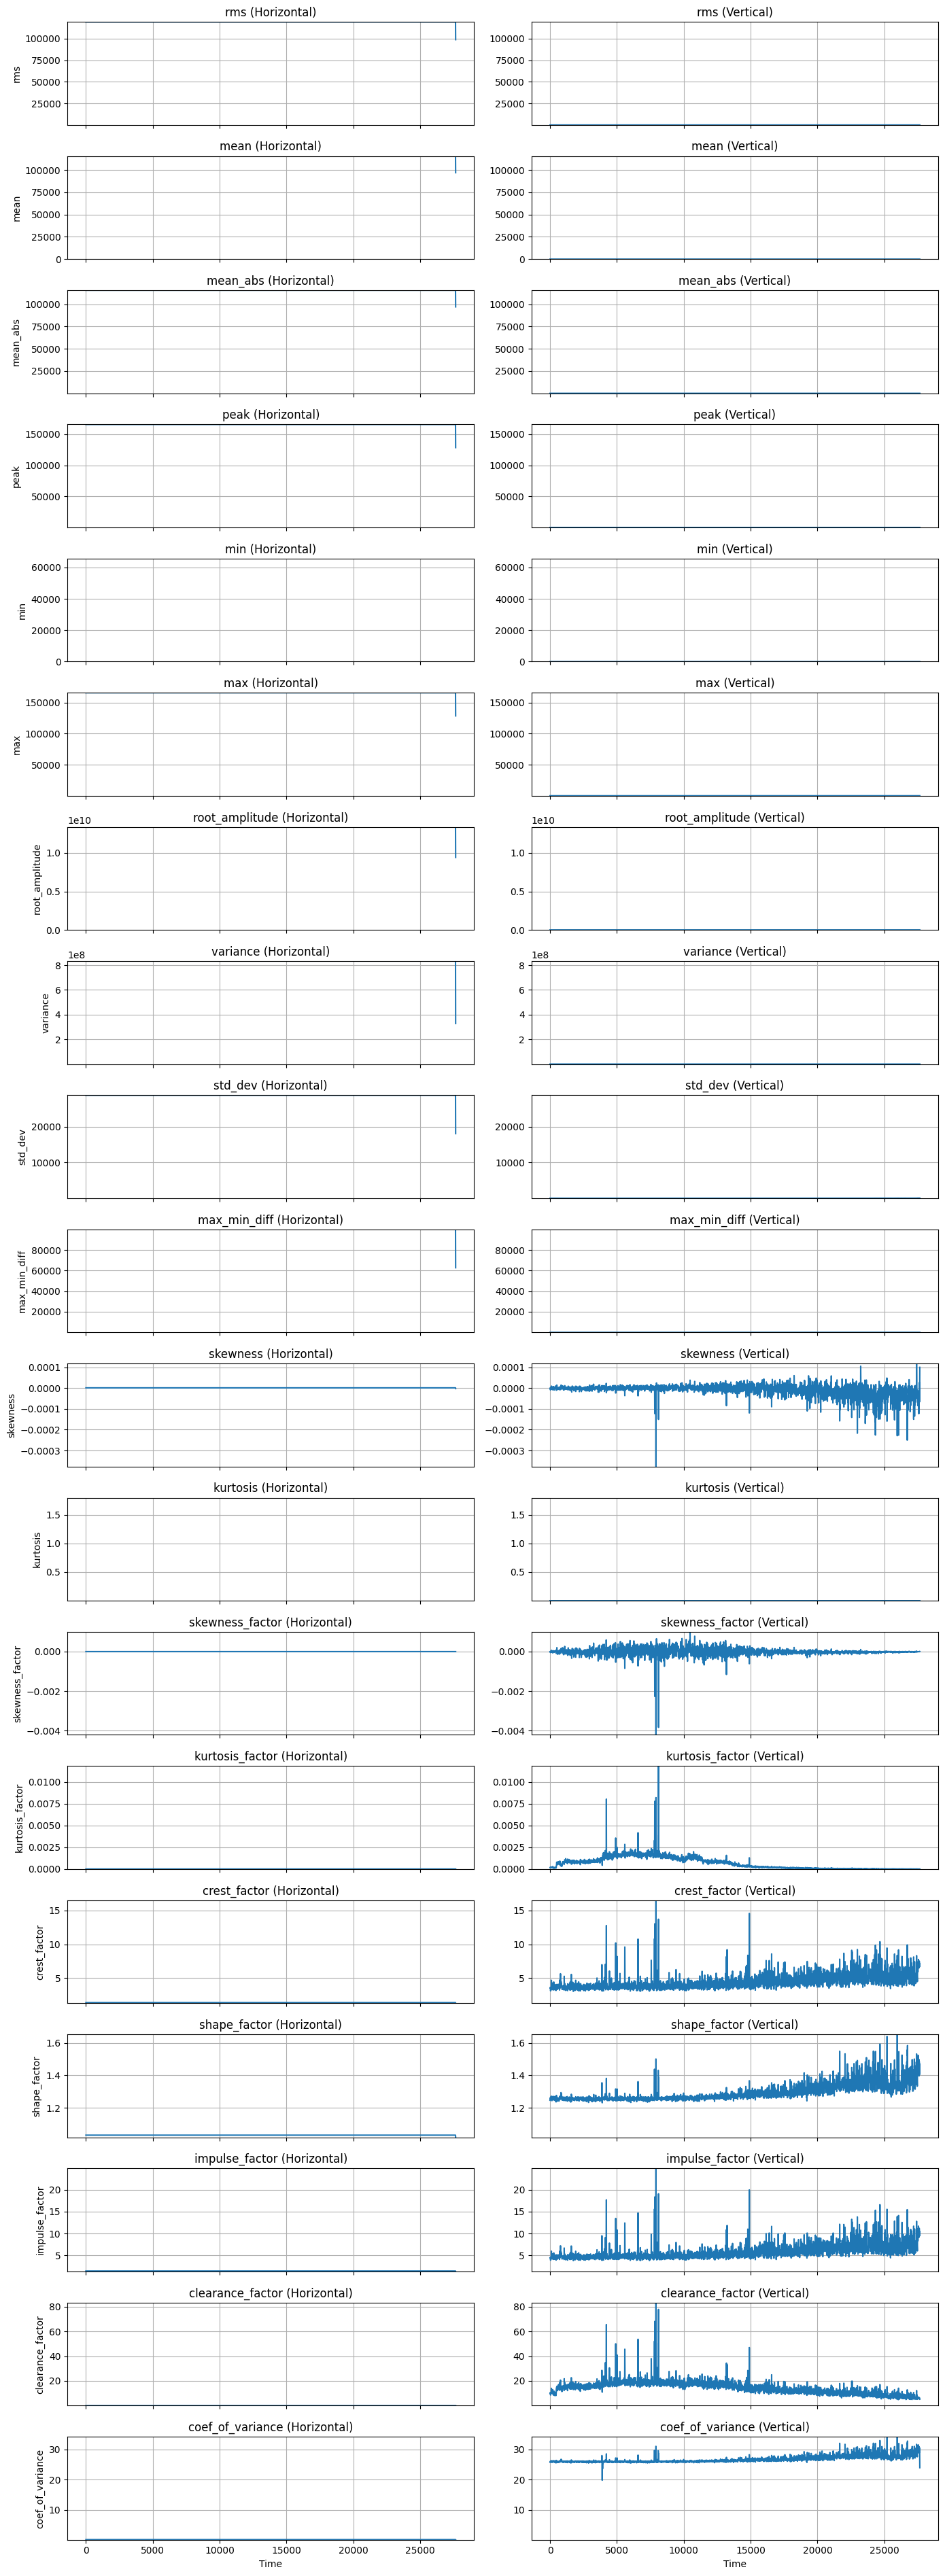

Trends for Bearing2_1_features


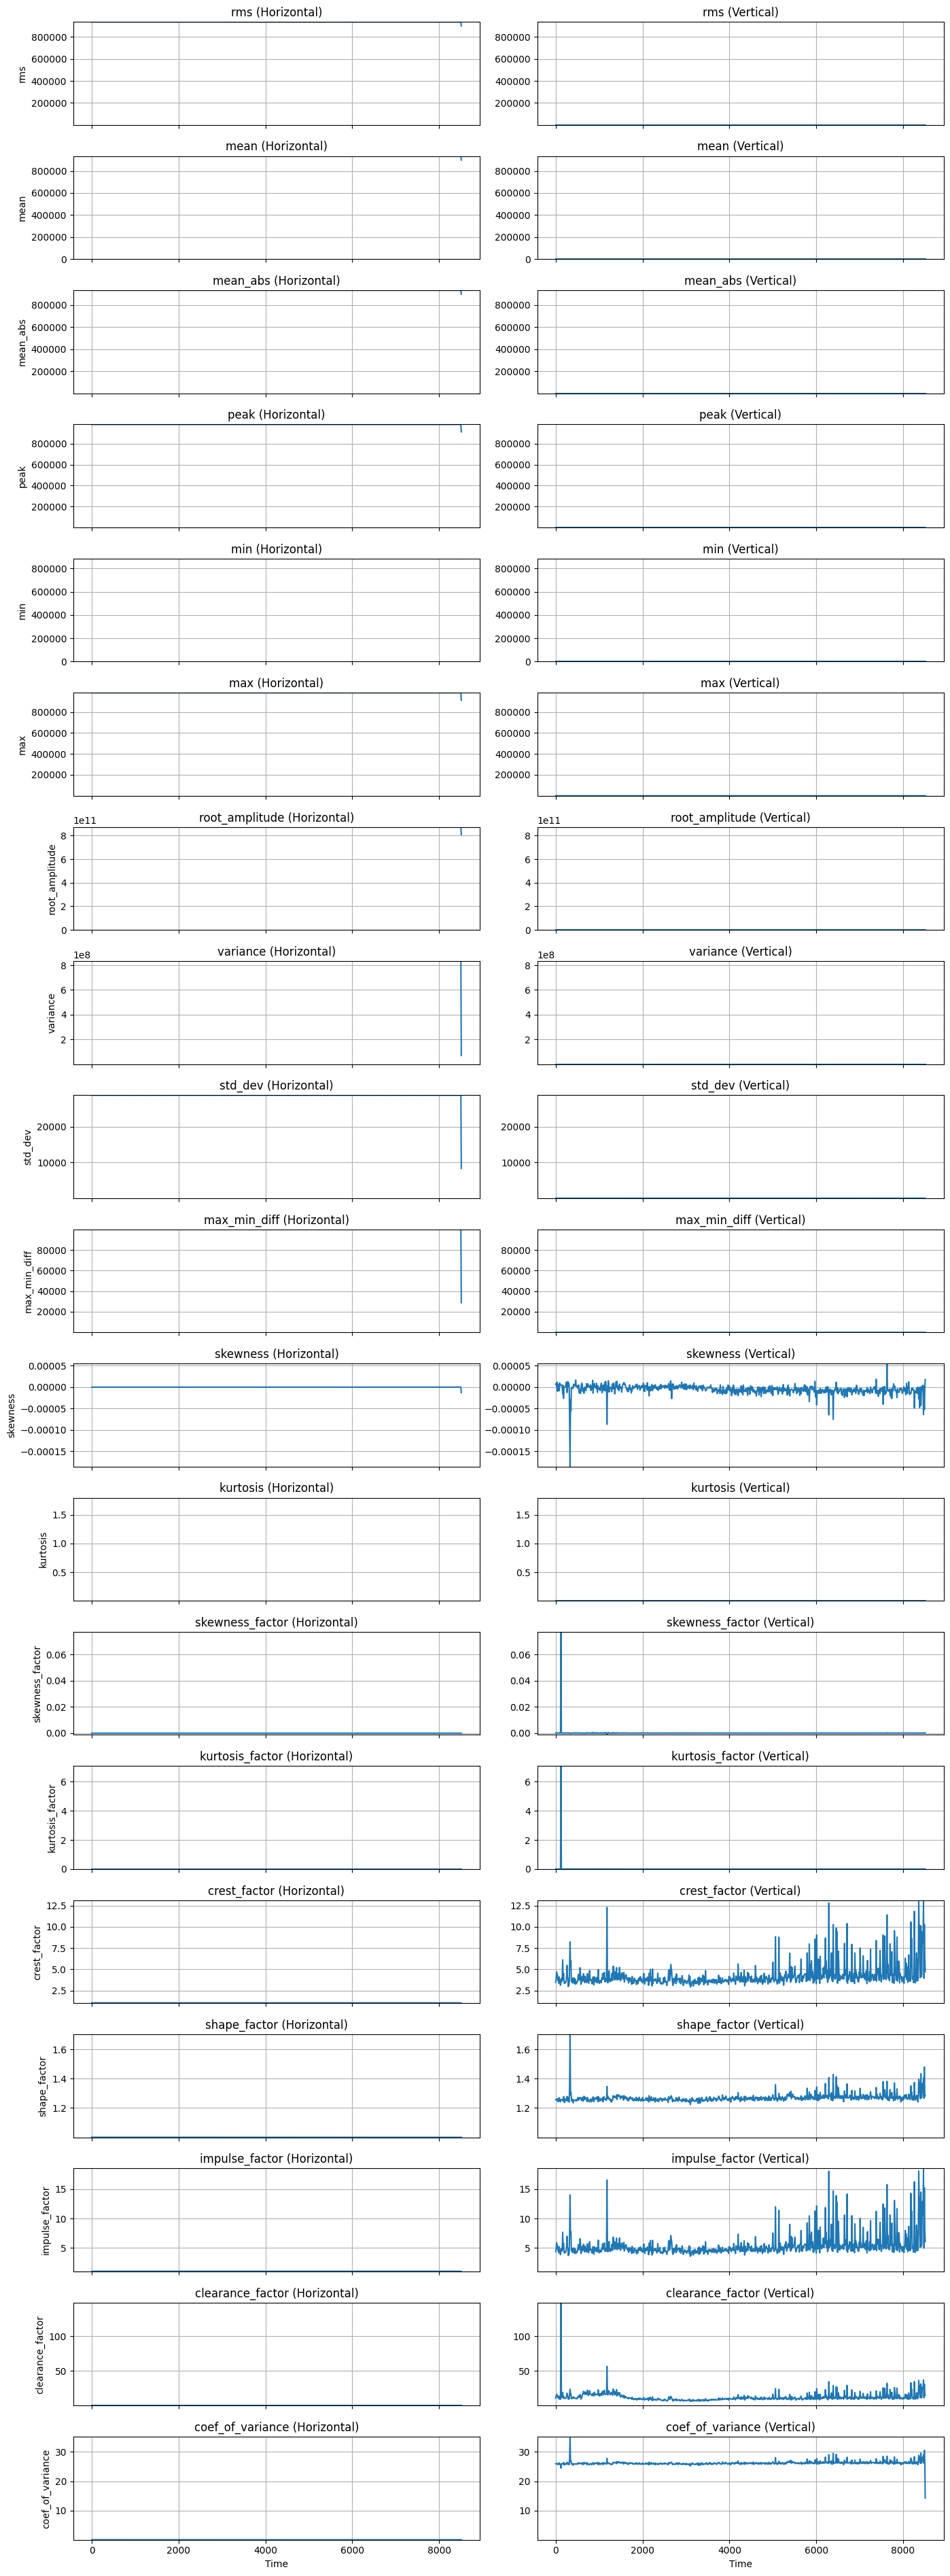

Trends for Bearing3_1_features


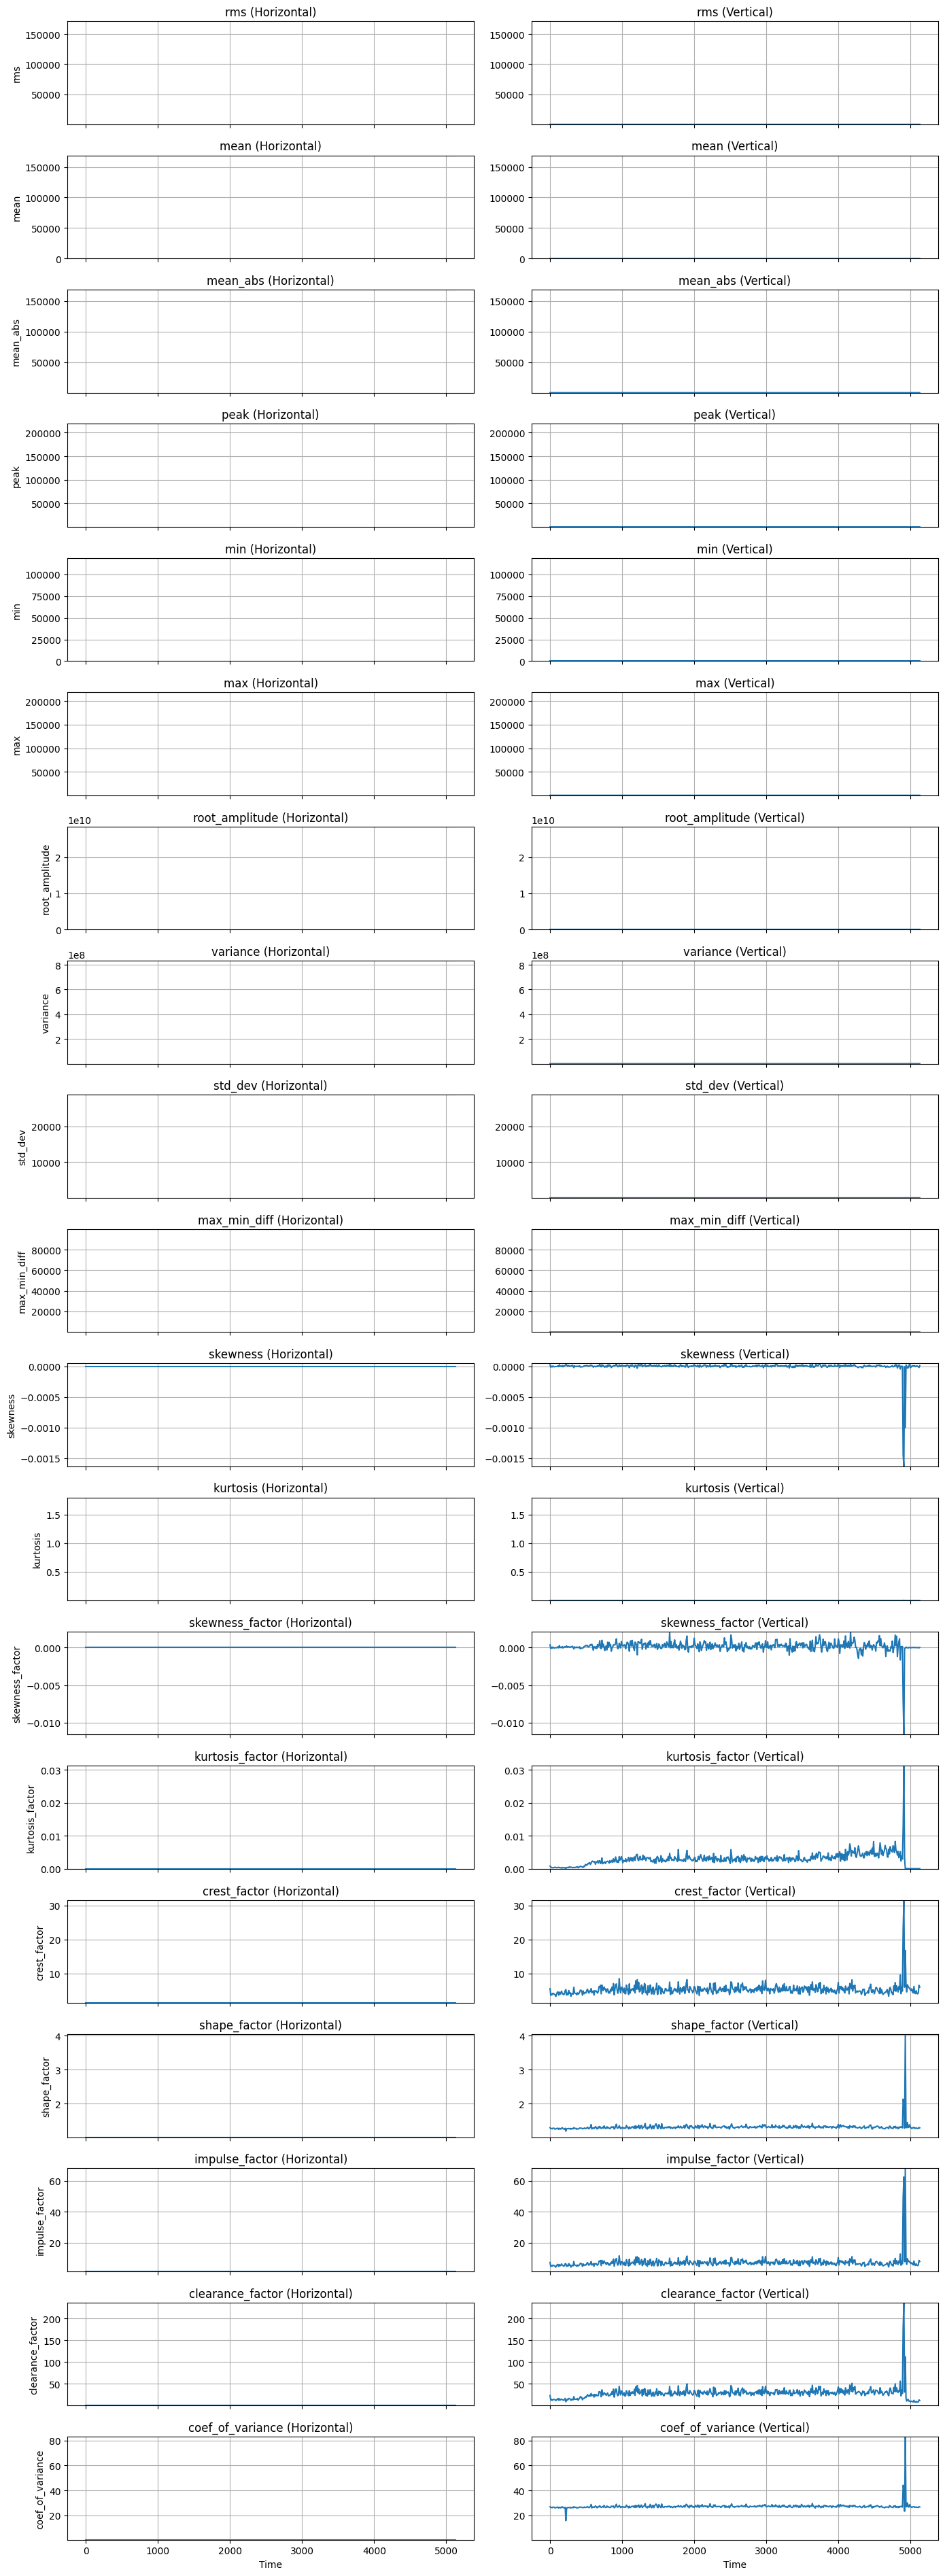

In [51]:
paths = ['../data/train/Bearing1_1_features.csv', '../data/train/Bearing2_1_features.csv', '../data/train/Bearing3_1_features.csv']

for path in paths:
    print(f"Trends for {path[14:-4]}")
    df = pd.read_csv(path)
    time = df["time_stamp"].values

    features = ["rms", "mean", "mean_abs", "peak", "min",
            "max", "root_amplitude", "variance", "std_dev", 
            "max_min_diff","skewness", "kurtosis", "skewness_factor",
                "kurtosis_factor", "crest_factor", "shape_factor",
                "impulse_factor", "clearance_factor", "coef_of_variance"]

    fig, axes = plt.subplots(
        nrows=len(features),
        ncols=2,
        figsize=(14, 2 * len(features)),
        sharex=True
    )

    for i, feat in enumerate(features):
        hor = df[f"{feat}_hor"].values
        ver = df[f"{feat}_ver"].values

        y_min = min(hor.min(), ver.min())
        y_max = max(hor.max(), ver.max())

        # Horizontal plot
        axes[i, 0].plot(time, hor)
        axes[i, 0].set_ylabel(feat)
        axes[i, 0].set_title(f"{feat} (Horizontal)")
        axes[i, 0].set_ylim(y_min, y_max)
        axes[i, 0].grid(True)

        # Vertical plot
        axes[i, 1].plot(time, ver)
        axes[i, 1].set_title(f"{feat} (Vertical)")
        axes[i, 1].set_ylim(y_min, y_max)
        axes[i, 1].grid(True)

    for ax in axes[-1]:
        ax.set_xlabel("Time")

    plt.tight_layout()
    plt.show()


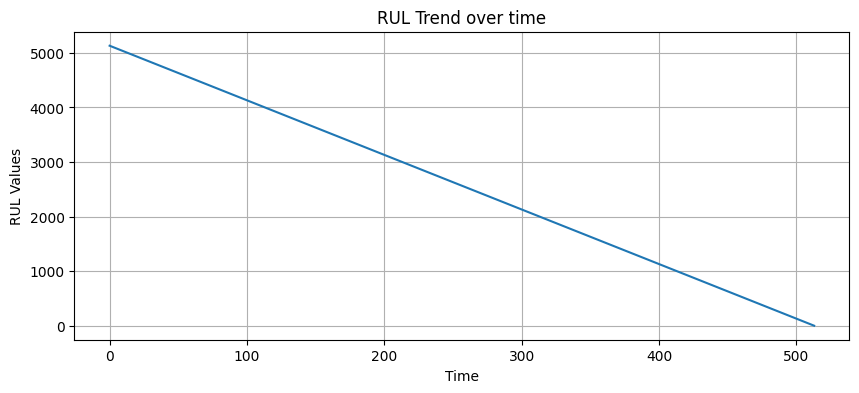

In [48]:
plt.figure(figsize=(10,4))
plt.plot(df['rul_value'])
plt.xlabel("Time")
plt.ylabel(f"RUL Values")
plt.title(f"RUL Trend over time")
plt.grid(True)
plt.show()

In [52]:
# normalization of features
scaler = MinMaxScaler()

final_feature_set = [
    "rms_ver",
    "variance_ver",
    "crest_factor_ver",
    "impulse_factor_ver",
    "clearance_factor_ver",
    "kurtosis_factor_ver"
]

paths = ['../data/train/Bearing1_1_features.csv', '../data/train/Bearing2_1_features.csv', '../data/train/Bearing3_1_features.csv',
         '../data/train/Bearing1_2_features.csv', '../data/train/Bearing2_2_features.csv', '../data/train/Bearing3_2_features.csv']

for path in paths:
    df = pd.read_csv(path)

    df_final = df[[f"{feat}" for feat in final_feature_set]]

    df_norm = pd.DataFrame(scaler.fit_transform(df_final), columns = df_final.columns)

    # Constructing a Health Indicator using PCA
    np_array = df_norm.values
    pca = PCA(n_components=1)
    hi = pca.fit_transform(np_array)
    df_norm['hi'] = hi.flatten()

    df_norm["hi_smooth"] = df_norm["hi"].rolling(window=15, min_periods=1).mean()
    df_norm["rul_value"] = df["rul_value"]
    df_norm.to_csv(f"../data/train/{path[14:24]}_normalized_features.csv", index=False)


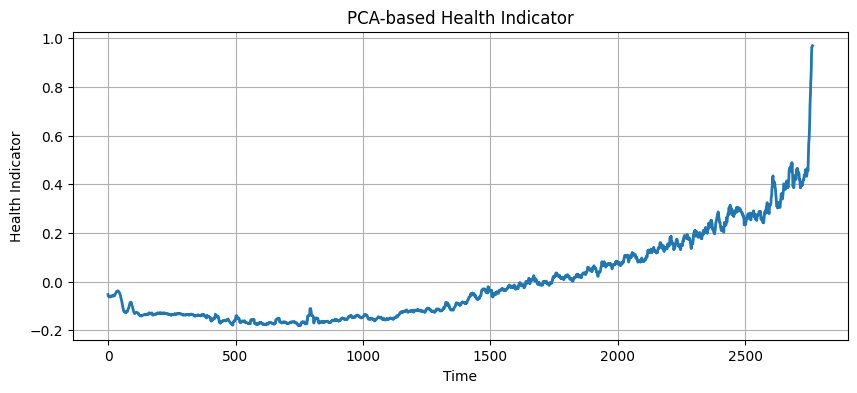

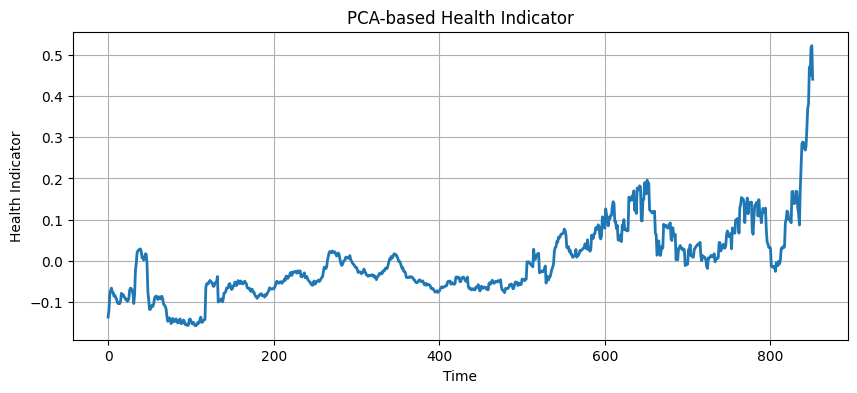

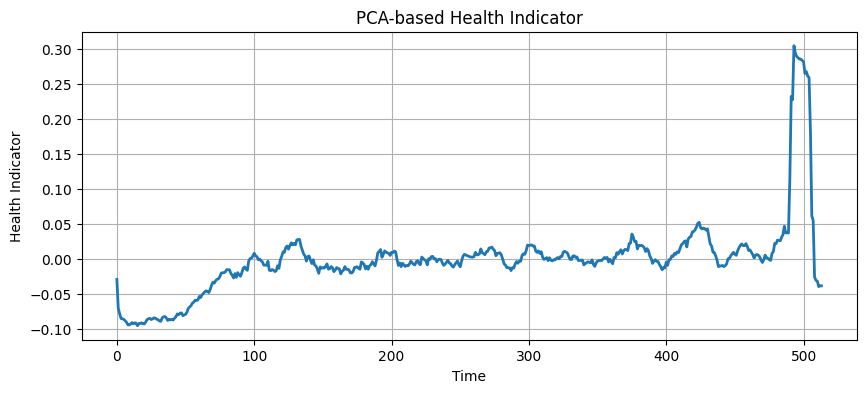

In [53]:
paths = ['../data/train/Bearing1_1_normalized_features.csv', '../data/train/Bearing2_1_normalized_features.csv', '../data/train/Bearing3_1_normalized_features.csv']

for path in paths:
    df = pd.read_csv(path)
    plt.figure(figsize=(10,4))
    plt.plot(df["hi_smooth"], linewidth=2)
    plt.xlabel("Time")
    plt.ylabel("Health Indicator")
    plt.title("PCA-based Health Indicator")
    plt.grid(True)
    plt.show()
